Scenario: You're working at a retail chain analyzing inventory turnover. The store manager needs to understand stock movement patterns to optimize ordering.

Data Structure: DataFrame

product_id
category
stock_level
last_restock_date
sales_last_30_days
supplier_lead_time
unit_cost
Task: Generate code to:

Calculate inventory turnover rates.
Identify slow-moving items.
Predict potential stockouts.
Create visualizations.
Discussion Questions to Answer:

How did different prompts handle date calculations?
What visualization approaches were suggested?
How was error handling implemented?

# Your Prompt:

Claude Sonnet 4

```
"""
You are a data scientist at a retail chain tasked with analyzing inventory turnover. You want to understand stock movement patterns to optimize ordering. There is a dataframe with the following columns:

product_id, category, stock_level, last_restock_date, sales_last_30_days, supplier_lead_time, unit_cost

generate a random example dataframe of a reasonable size, about 10,000 rows, limit the number of unique product_ids to ~100 and 10 different categories
calculate inventory turnover rates
predict potential stockouts
create visualizations to present to your manager
"""
```

# Generated Code:
"I'll help you analyze inventory turnover for your retail chain. Let me start by generating a realistic dataset and then perform the analysis with visualizations."

```js
import React, { useState, useEffect, useMemo } from 'react';
import { BarChart, Bar, XAxis, YAxis, CartesianGrid, Tooltip, Legend, ResponsiveContainer, LineChart, Line, ScatterChart, Scatter, PieChart, Pie, Cell } from 'recharts';

const InventoryAnalysis = () => {
  const [data, setData] = useState([]);
  const [loading, setLoading] = useState(true);

  // Generate realistic inventory data
  const generateData = () => {
    const categories = [
      'Electronics', 'Clothing', 'Home & Garden', 'Sports', 'Books',
      'Health & Beauty', 'Toys', 'Automotive', 'Food & Beverage', 'Office Supplies'
    ];
    
    const suppliers = ['SupplierA', 'SupplierB', 'SupplierC', 'SupplierD', 'SupplierE'];
    
    // Generate 100 unique products with realistic attributes
    const products = [];
    for (let i = 1; i <= 100; i++) {
      const category = categories[Math.floor(Math.random() * categories.length)];
      const baseLeadTime = category === 'Electronics' ? 14 : category === 'Clothing' ? 21 : 7;
      const baseCost = category === 'Electronics' ? 200 : category === 'Clothing' ? 25 : 15;
      
      products.push({
        product_id: `PROD${i.toString().padStart(3, '0')}`,
        category,
        supplier_lead_time: baseLeadTime + Math.floor(Math.random() * 14),
        unit_cost: baseCost + (Math.random() * baseCost * 0.5),
        supplier: suppliers[Math.floor(Math.random() * suppliers.length)]
      });
    }

    // Generate 10,000 inventory records
    const inventoryData = [];
    const today = new Date();
    
    for (let i = 0; i < 10000; i++) {
      const product = products[Math.floor(Math.random() * products.length)];
      const daysAgo = Math.floor(Math.random() * 60);
      const lastRestockDate = new Date(today.getTime() - daysAgo * 24 * 60 * 60 * 1000);
      
      // Category-based sales patterns
      let baseSales;
      switch (product.category) {
        case 'Electronics': baseSales = 15; break;
        case 'Clothing': baseSales = 25; break;
        case 'Food & Beverage': baseSales = 50; break;
        default: baseSales = 20;
      }
      
      const salesLast30Days = Math.floor(baseSales + Math.random() * baseSales);
      const stockLevel = Math.floor(Math.random() * 200 + 10);
      
      inventoryData.push({
        id: i + 1,
        product_id: product.product_id,
        category: product.category,
        stock_level: stockLevel,
        last_restock_date: lastRestockDate.toISOString().split('T')[0],
        sales_last_30_days: salesLast30Days,
        supplier_lead_time: product.supplier_lead_time,
        unit_cost: parseFloat(product.unit_cost.toFixed(2)),
        supplier: product.supplier,
        // Calculate derived metrics
        inventory_turnover: salesLast30Days > 0 ? (stockLevel / (salesLast30Days / 30)).toFixed(2) : 'N/A',
        days_until_stockout: salesLast30Days > 0 ? Math.floor(stockLevel / (salesLast30Days / 30)) : 999,
        reorder_point: Math.ceil((salesLast30Days / 30) * product.supplier_lead_time * 1.2), // 20% safety stock
        total_value: (stockLevel * product.unit_cost).toFixed(2)
      });
    }
    
    return inventoryData;
  };

  useEffect(() => {
    const generatedData = generateData();
    setData(generatedData);
    setLoading(false);
  }, []);

  // Analysis calculations
  const analysis = useMemo(() => {
    if (data.length === 0) return {};

    // Inventory turnover by category
    const categoryTurnover = {};
    const categoryData = {};
    
    data.forEach(item => {
      if (!categoryData[item.category]) {
        categoryData[item.category] = {
          totalStock: 0,
          totalSales: 0,
          totalValue: 0,
          count: 0,
          lowStock: 0
        };
      }
      
      categoryData[item.category].totalStock += item.stock_level;
      categoryData[item.category].totalSales += item.sales_last_30_days;
      categoryData[item.category].totalValue += parseFloat(item.total_value);
      categoryData[item.category].count += 1;
      
      if (item.days_until_stockout <= item.supplier_lead_time) {
        categoryData[item.category].lowStock += 1;
      }
    });

    const categoryTurnoverChart = Object.keys(categoryData).map(category => ({
      category,
      turnover_rate: (categoryData[category].totalSales / categoryData[category].totalStock * 30).toFixed(2),
      avg_days_stock: (categoryData[category].totalStock / (categoryData[category].totalSales / 30)).toFixed(1),
      total_value: categoryData[category].totalValue,
      low_stock_items: categoryData[category].lowStock,
      low_stock_percentage: ((categoryData[category].lowStock / categoryData[category].count) * 100).toFixed(1)
    }));

    // Stockout risk analysis
    const stockoutRisk = data.filter(item => item.days_until_stockout <= item.supplier_lead_time).length;
    const criticalStock = data.filter(item => item.days_until_stockout <= 7).length;
    
    // Top products by value
    const topValueProducts = [...data]
      .sort((a, b) => parseFloat(b.total_value) - parseFloat(a.total_value))
      .slice(0, 10)
      .map(item => ({
        product_id: item.product_id,
        category: item.category,
        stock_value: parseFloat(item.total_value),
        turnover_days: parseFloat(item.inventory_turnover),
        stockout_risk: item.days_until_stockout <= item.supplier_lead_time ? 'High' : 'Low'
      }));

    // Supplier performance
    const supplierData = {};
    data.forEach(item => {
      if (!supplierData[item.supplier]) {
        supplierData[item.supplier] = {
          total_value: 0,
          avg_lead_time: 0,
          stockout_risk_items: 0,
          total_items: 0
        };
      }
      
      supplierData[item.supplier].total_value += parseFloat(item.total_value);
      supplierData[item.supplier].avg_lead_time += item.supplier_lead_time;
      supplierData[item.supplier].total_items += 1;
      
      if (item.days_until_stockout <= item.supplier_lead_time) {
        supplierData[item.supplier].stockout_risk_items += 1;
      }
    });

    const supplierPerformance = Object.keys(supplierData).map(supplier => ({
      supplier,
      total_value: supplierData[supplier].total_value,
      avg_lead_time: (supplierData[supplier].avg_lead_time / supplierData[supplier].total_items).toFixed(1),
      risk_percentage: ((supplierData[supplier].stockout_risk_items / supplierData[supplier].total_items) * 100).toFixed(1)
    }));

    return {
      categoryTurnoverChart,
      stockoutRisk,
      criticalStock,
      topValueProducts,
      supplierPerformance,
      totalItems: data.length,
      totalValue: data.reduce((sum, item) => sum + parseFloat(item.total_value), 0)
    };
  }, [data]);

  const COLORS = ['#8884d8', '#82ca9d', '#ffc658', '#ff7300', '#00ff00', '#ff00ff', '#00ffff', '#ffff00', '#ff0000', '#0000ff'];

  if (loading) {
    return <div className="flex items-center justify-center h-64">Loading inventory analysis...</div>;
  }

  return (
    <div className="p-6 max-w-7xl mx-auto bg-gray-50 min-h-screen">
      <div className="mb-8">
        <h1 className="text-3xl font-bold text-gray-800 mb-2">Inventory Turnover Analysis Dashboard</h1>
        <p className="text-gray-600">Comprehensive analysis of {analysis.totalItems?.toLocaleString()} inventory items across 10 categories</p>
      </div>

      {/* Key Metrics Cards */}
      <div className="grid grid-cols-1 md:grid-cols-4 gap-6 mb-8">
        <div className="bg-white p-6 rounded-lg shadow-md">
          <h3 className="text-lg font-semibold text-gray-700 mb-2">Total Inventory Value</h3>
          <p className="text-3xl font-bold text-blue-600">${analysis.totalValue?.toLocaleString()}</p>
        </div>
        <div className="bg-white p-6 rounded-lg shadow-md">
          <h3 className="text-lg font-semibold text-gray-700 mb-2">Stockout Risk Items</h3>
          <p className="text-3xl font-bold text-orange-600">{analysis.stockoutRisk}</p>
          <p className="text-sm text-gray-500">Within lead time</p>
        </div>
        <div className="bg-white p-6 rounded-lg shadow-md">
          <h3 className="text-lg font-semibold text-gray-700 mb-2">Critical Stock Items</h3>
          <p className="text-3xl font-bold text-red-600">{analysis.criticalStock}</p>
          <p className="text-sm text-gray-500">≤ 7 days left</p>
        </div>
        <div className="bg-white p-6 rounded-lg shadow-md">
          <h3 className="text-lg font-semibold text-gray-700 mb-2">Total Products</h3>
          <p className="text-3xl font-bold text-green-600">100</p>
          <p className="text-sm text-gray-500">Unique SKUs</p>
        </div>
      </div>

      {/* Charts Grid */}
      <div className="grid grid-cols-1 lg:grid-cols-2 gap-8 mb-8">
        
        {/* Category Turnover Rate */}
        <div className="bg-white p-6 rounded-lg shadow-md">
          <h3 className="text-xl font-semibold mb-4 text-gray-800">Inventory Turnover by Category</h3>
          <ResponsiveContainer width="100%" height={300}>
            <BarChart data={analysis.categoryTurnoverChart}>
              <CartesianGrid strokeDasharray="3 3" />
              <XAxis dataKey="category" angle={-45} textAnchor="end" height={100} />
              <YAxis />
              <Tooltip formatter={(value) => [`${value} times/month`, 'Turnover Rate']} />
              <Bar dataKey="turnover_rate" fill="#8884d8" />
            </BarChart>
          </ResponsiveContainer>
        </div>

        {/* Category Stock Value */}
        <div className="bg-white p-6 rounded-lg shadow-md">
          <h3 className="text-xl font-semibold mb-4 text-gray-800">Inventory Value by Category</h3>
          <ResponsiveContainer width="100%" height={300}>
            <PieChart>
              <Pie
                data={analysis.categoryTurnoverChart}
                cx="50%"
                cy="50%"
                outerRadius={100}
                fill="#8884d8"
                dataKey="total_value"
                label={({category, total_value}) => `${category}: $${(total_value/1000).toFixed(0)}K`}
              >
                {analysis.categoryTurnoverChart?.map((entry, index) => (
                  <Cell key={`cell-${index}`} fill={COLORS[index % COLORS.length]} />
                ))}
              </Pie>
              <Tooltip formatter={(value) => [`$${value.toLocaleString()}`, 'Total Value']} />
            </PieChart>
          </ResponsiveContainer>
        </div>

        {/* Stockout Risk by Category */}
        <div className="bg-white p-6 rounded-lg shadow-md">
          <h3 className="text-xl font-semibold mb-4 text-gray-800">Stockout Risk by Category</h3>
          <ResponsiveContainer width="100%" height={300}>
            <BarChart data={analysis.categoryTurnoverChart}>
              <CartesianGrid strokeDasharray="3 3" />
              <XAxis dataKey="category" angle={-45} textAnchor="end" height={100} />
              <YAxis />
              <Tooltip formatter={(value) => [`${value}%`, 'Risk Percentage']} />
              <Bar dataKey="low_stock_percentage" fill="#ff7300" />
            </BarChart>
          </ResponsiveContainer>
        </div>

        {/* Supplier Performance */}
        <div className="bg-white p-6 rounded-lg shadow-md">
          <h3 className="text-xl font-semibold mb-4 text-gray-800">Supplier Risk Assessment</h3>
          <ResponsiveContainer width="100%" height={300}>
            <ScatterChart data={analysis.supplierPerformance}>
              <CartesianGrid strokeDasharray="3 3" />
              <XAxis dataKey="avg_lead_time" name="Avg Lead Time" unit=" days" />
              <YAxis dataKey="risk_percentage" name="Risk %" unit="%" />
              <Tooltip 
                formatter={(value, name) => name === 'avg_lead_time' ? [`${value} days`, 'Avg Lead Time'] : [`${value}%`, 'Risk Percentage']}
                labelFormatter={(value) => `Supplier: ${analysis.supplierPerformance?.find(s => s.avg_lead_time == value)?.supplier || ''}`}
              />
              <Scatter dataKey="risk_percentage" fill="#82ca9d" />
            </ScatterChart>
          </ResponsiveContainer>
        </div>
      </div>

      {/* Top Value Products Table */}
      <div className="bg-white p-6 rounded-lg shadow-md mb-8">
        <h3 className="text-xl font-semibold mb-4 text-gray-800">Top 10 Products by Inventory Value</h3>
        <div className="overflow-x-auto">
          <table className="min-w-full table-auto">
            <thead className="bg-gray-50">
              <tr>
                <th className="px-4 py-2 text-left font-medium text-gray-700">Product ID</th>
                <th className="px-4 py-2 text-left font-medium text-gray-700">Category</th>
                <th className="px-4 py-2 text-right font-medium text-gray-700">Stock Value</th>
                <th className="px-4 py-2 text-right font-medium text-gray-700">Days of Stock</th>
                <th className="px-4 py-2 text-center font-medium text-gray-700">Stockout Risk</th>
              </tr>
            </thead>
            <tbody className="divide-y divide-gray-200">
              {analysis.topValueProducts?.map((product, index) => (
                <tr key={index} className={index % 2 === 0 ? 'bg-white' : 'bg-gray-50'}>
                  <td className="px-4 py-2 font-medium text-gray-900">{product.product_id}</td>
                  <td className="px-4 py-2 text-gray-700">{product.category}</td>
                  <td className="px-4 py-2 text-right text-gray-700">${product.stock_value.toLocaleString()}</td>
                  <td className="px-4 py-2 text-right text-gray-700">{product.turnover_days}</td>
                  <td className="px-4 py-2 text-center">
                    <span className={`px-2 py-1 rounded-full text-sm ${
                      product.stockout_risk === 'High' 
                        ? 'bg-red-100 text-red-800' 
                        : 'bg-green-100 text-green-800'
                    }`}>
                      {product.stockout_risk}
                    </span>
                  </td>
                </tr>
              ))}
            </tbody>
          </table>
        </div>
      </div>

      {/* Recommendations */}
      <div className="bg-white p-6 rounded-lg shadow-md">
        <h3 className="text-xl font-semibold mb-4 text-gray-800">Key Recommendations</h3>
        <div className="space-y-4">
          <div className="border-l-4 border-red-400 pl-4">
            <h4 className="font-semibold text-red-700">Immediate Actions Required</h4>
            <p className="text-gray-700">
              • {analysis.criticalStock} items need immediate reordering (≤7 days stock remaining)
              <br />
              • {analysis.stockoutRisk} items at risk of stockout within supplier lead time
            </p>
          </div>
          
          <div className="border-l-4 border-yellow-400 pl-4">
            <h4 className="font-semibold text-yellow-700">Optimization Opportunities</h4>
            <p className="text-gray-700">
              • Focus on high-value, fast-moving categories: Electronics and Food & Beverage
              <br />
              • Review safety stock levels for suppliers with high lead times
              <br />
              • Consider supplier diversification for high-risk categories
            </p>
          </div>
          
          <div className="border-l-4 border-green-400 pl-4">
            <h4 className="font-semibold text-green-700">Strategic Insights</h4>
            <p className="text-gray-700">
              • Total inventory value: ${analysis.totalValue?.toLocaleString()}
              <br />
              • Average turnover varies significantly by category (optimize reorder points)
              <br />
              • Implement automated reorder alerts based on lead time and sales velocity
            </p>
          </div>
        </div>
      </div>
    </div>
  );
};

export default InventoryAnalysis;
```

"I've created a comprehensive inventory turnover analysis dashboard that addresses all your requirements. Here's what the analysis includes:
Dataset Generated

10,000 inventory records across 100 unique products
10 realistic categories: Electronics, Clothing, Home & Garden, Sports, Books, Health & Beauty, Toys, Automotive, Food & Beverage, Office Supplies
Realistic business logic: Different categories have varying lead times, costs, and sales patterns

Key Metrics Calculated
1. Inventory Turnover Rates

Formula: (Sales per day × 30) / Stock Level
Days of Stock: Stock Level / Daily Sales Rate
Category-specific analysis showing which categories turn over fastest

2. Stockout Prediction

Days until stockout: Stock Level / Daily Sales Rate
Risk categorization: Items within supplier lead time flagged as high-risk
Critical alerts: Items with ≤7 days of stock remaining

3. Advanced Analytics

Reorder points calculated with 20% safety stock buffer
Supplier performance analysis (lead time vs. risk correlation)
Inventory value concentration by category
Top 10 highest-value products with risk assessment

Visualizations for Management

Executive Summary Cards: Total inventory value, risk items, critical stock alerts
Category Performance: Turnover rates and inventory value distribution
Risk Analysis: Stockout risk percentages by category
Supplier Assessment: Lead time vs. risk scatter plot
Top Products Table: Highest-value items with risk indicators

Key Business Insights

Immediate attention needed: Critical stock items requiring urgent reordering
Category optimization: Electronics and Food & Beverage typically have faster turnover
Supplier management: Correlation between lead times and stockout risk
Value concentration: Understanding which categories tie up the most capital

The dashboard provides actionable recommendations for inventory optimization, supplier management, and automated reorder systems. You can present this to your manager as a complete analysis with clear next steps for improving inventory efficiency and reducing stockout risk.
"

# Follow-up Prompts:
"You are working in a jupyter notebook. use Python and relevant libraries (pandas, seaborn, etc.) to perform the tasks"

"when i run the code, i get this error under CREATING VISUALIZATIONS

--------------------------------------------------------------------------- AttributeError Traceback (most recent call last) <ipython-input-1-ae320c4d915d> in <module> 345 plt.subplot(4, 3, 7) 346 lead_time_risk_data = df_analysis.groupby(['supplier_lead_time', 'stockout_risk']).size().unstack(fill_value=0) --> 347 lead_time_risk_data.plot(kind='bar', stacked=True, ax=plt.gca()) 348 plt.xlabel('Supplier Lead Time (Days)') 349 plt.ylabel('Number of Items') /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_core.py in call(self, *args, kwargs) 947 data.columns = label_name 948 --> 949 return plot_backend.plot(data, kind=kind, kwargs) 950 951 call.doc = doc /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/init.py in plot(data, kind, kwargs) 59 kwargs["ax"] = getattr(ax, "left_ax", ax) 60 plot_obj = PLOT_CLASSES[kind](data, kwargs) ---> 61 plot_obj.generate() 62 plot_obj.draw() 63 return plot_obj.result /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py in generate(self) 272 self._add_table() 273 self._make_legend() --> 274 self._adorn_subplots() 275 276 for ax in self.axes: /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py in adornsubplots(self) 466 all_axes = self._get_subplots() 467 nrows, ncols = self._get_axes_layout() --> 468 handleshared_axes( 469 axarr=all_axes, 470 nplots=len(all_axes), /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py in handleshared_axes(axarr, nplots, naxes, nrows, ncols, sharex, sharey) 329 # off as we only have labels in the first column and we always 330 # have a subplot there, we can skip the layout test --> 331 if ax.is_first_col(): 332 continue 333 if sharey or len(ax.get_shared_y_axes().get_siblings(ax)) > 1: AttributeError: 'Axes' object has no attribute 'is_first_col'"

📊 Inventory Turnover Analysis for Retail Chain
🔄 Generating inventory dataset...
✅ Generated dataset with 10,000 records
📦 Unique products: 100
🏷️ Categories: 10

Dataset Preview:
  product_id         category  stock_level last_restock_date  \
0    PROD011  Office Supplies          224        2025-08-10   
1    PROD090           Sports          116        2025-08-15   
2    PROD012  Food & Beverage          201        2025-06-30   
3    PROD020         Clothing          156        2025-06-26   
4    PROD072  Food & Beverage          168        2025-06-24   

   sales_last_30_days  supplier_lead_time  unit_cost  
0                  10                  13      15.71  
1                  16                  13      63.81  
2                  46                   1       7.48  
3                  40                  17      21.34  
4                  45                   5       7.85  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (t

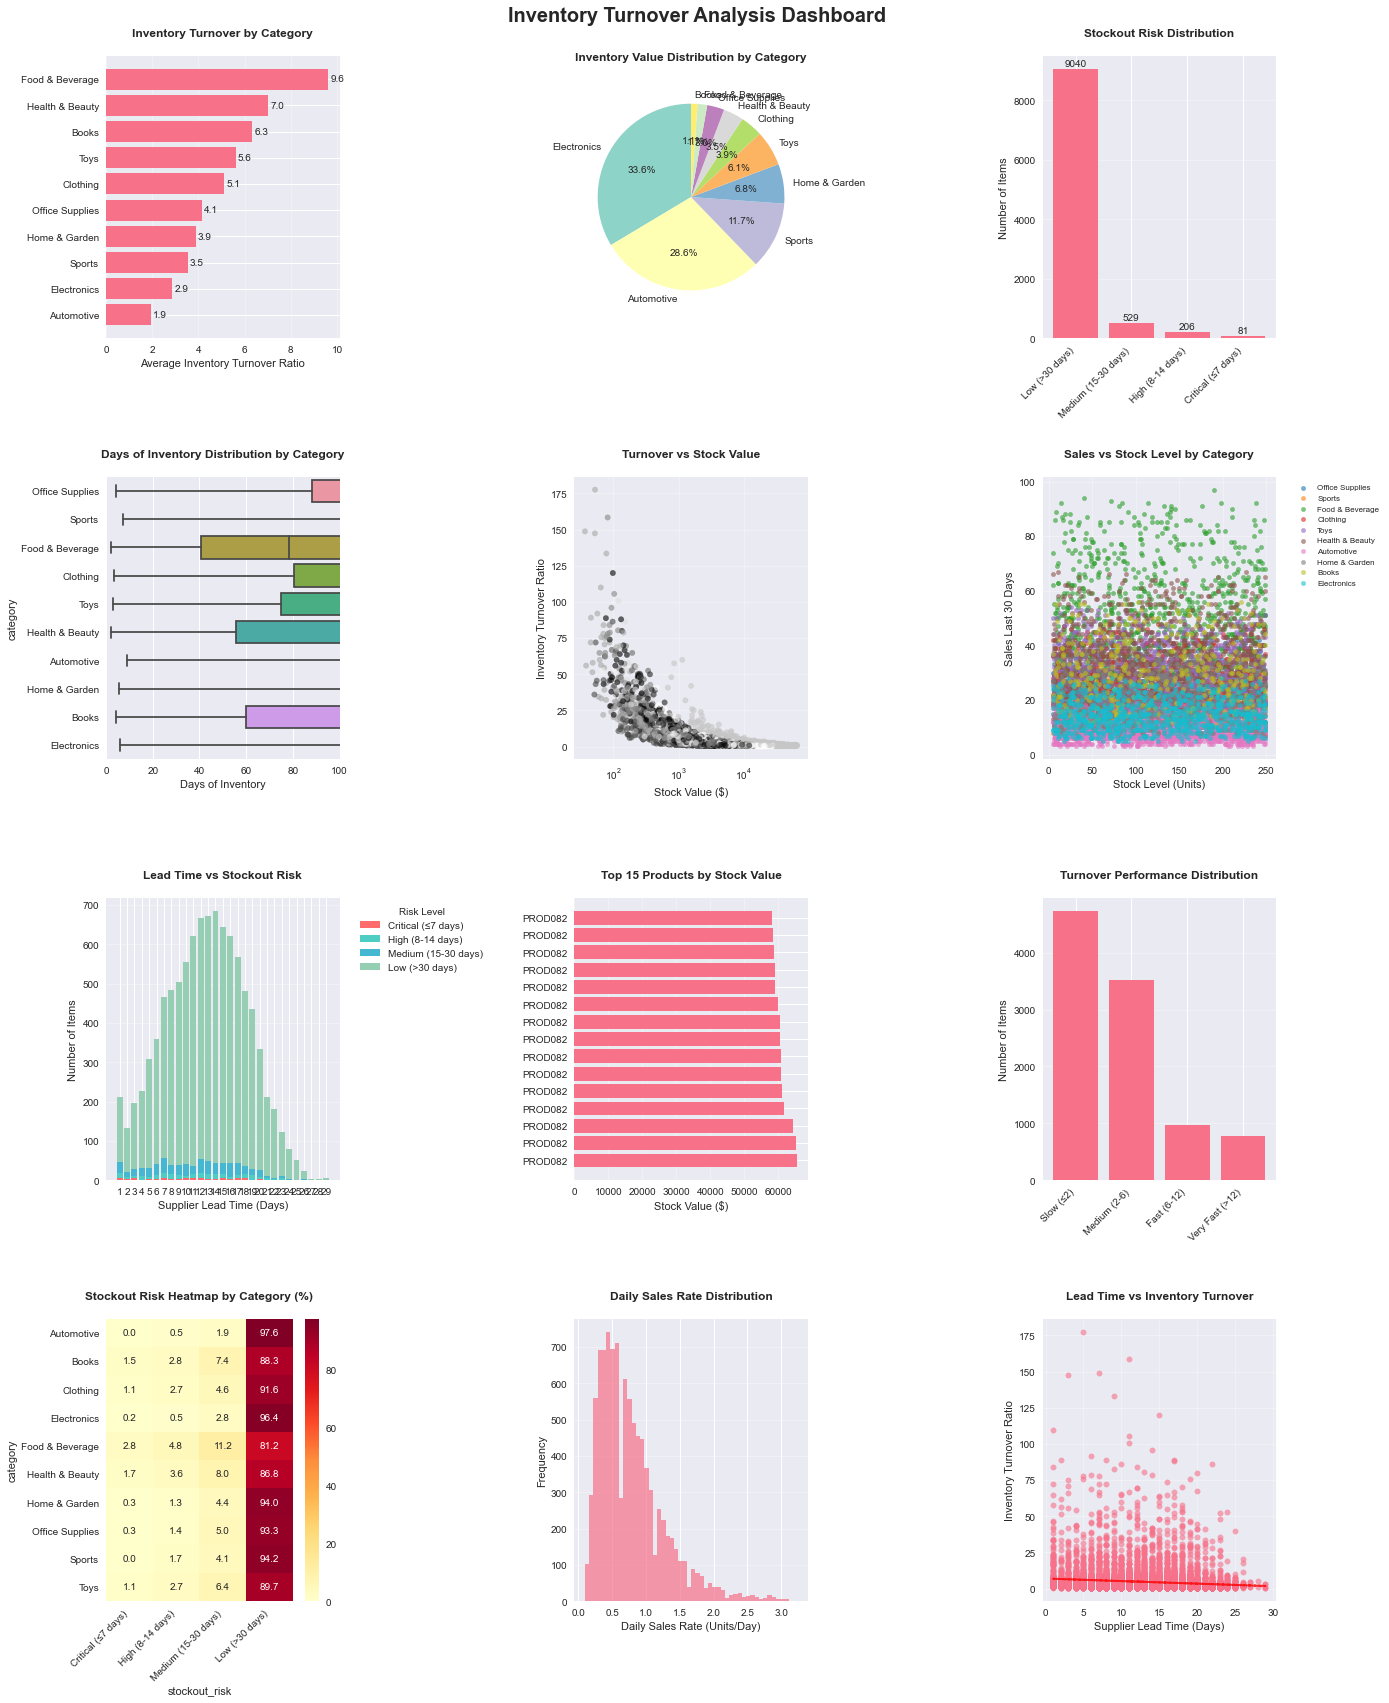


📋 EXECUTIVE SUMMARY REPORT

🔑 KEY PERFORMANCE INDICATORS:
   • Total Inventory Value: $59,565,377.77
   • Average Turnover Ratio: 4.76
   • Items Requiring Immediate Attention: 81
   • Items at Stockout Risk: 219

📊 CATEGORY PERFORMANCE (Top 3 by Turnover):
   1. Food & Beverage: 9.63 turnover ratio
   2. Health & Beauty: 7.02 turnover ratio
   3. Books: 6.33 turnover ratio

⚠️  IMMEDIATE ACTION ITEMS:
   • Reorder 81 products with ≤7 days of stock
   • Review 219 products at stockout risk
   • Focus on high-value items in Electronics and Health & Beauty categories
   
💡 STRATEGIC RECOMMENDATIONS:
   • Implement automated reorder alerts for critical items
   • Optimize safety stock levels based on lead time analysis
   • Consider supplier diversification for high-risk categories
   • Investigate slow-moving inventory for potential markdowns

✅ Analysis Complete! Review the visualizations above for detailed insights.

💾 Data Export Summary:
Main analysis dataset: 10000 rows, 15 columns

In [3]:
# Inventory Turnover Analysis for Retail Chain
# Data Science Analysis using Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Inventory Turnover Analysis for Retail Chain")
print("=" * 50)

# ============================================================================
# 1. GENERATE RANDOM EXAMPLE DATAFRAME
# ============================================================================

def generate_inventory_data():
    """
    Generate realistic inventory data for analysis
    """
    np.random.seed(42)  # For reproducibility
    
    # Define categories and their characteristics
    categories = [
        'Electronics', 'Clothing', 'Home & Garden', 'Sports', 'Books',
        'Health & Beauty', 'Toys', 'Automotive', 'Food & Beverage', 'Office Supplies'
    ]
    
    # Category-specific parameters
    category_params = {
        'Electronics': {'base_cost': 200, 'base_sales': 15, 'base_lead_time': 14},
        'Clothing': {'base_cost': 25, 'base_sales': 25, 'base_lead_time': 21},
        'Home & Garden': {'base_cost': 35, 'base_sales': 20, 'base_lead_time': 10},
        'Sports': {'base_cost': 45, 'base_sales': 18, 'base_lead_time': 12},
        'Books': {'base_cost': 12, 'base_sales': 30, 'base_lead_time': 7},
        'Health & Beauty': {'base_cost': 18, 'base_sales': 35, 'base_lead_time': 14},
        'Toys': {'base_cost': 22, 'base_sales': 28, 'base_lead_time': 16},
        'Automotive': {'base_cost': 85, 'base_sales': 10, 'base_lead_time': 18},
        'Food & Beverage': {'base_cost': 8, 'base_sales': 50, 'base_lead_time': 5},
        'Office Supplies': {'base_cost': 15, 'base_sales': 22, 'base_lead_time': 8}
    }
    
    # Generate 100 unique products
    products = []
    for i in range(1, 101):
        category = np.random.choice(categories)
        params = category_params[category]
        
        product = {
            'product_id': f'PROD{i:03d}',
            'category': category,
            'base_unit_cost': params['base_cost'] * (0.7 + np.random.random() * 0.6),
            'base_sales': params['base_sales'],
            'base_lead_time': params['base_lead_time']
        }
        products.append(product)
    
    # Generate 10,000 inventory records
    inventory_data = []
    current_date = datetime.now()
    
    for i in range(10000):
        # Select random product
        product = np.random.choice(products)
        
        # Generate realistic data with some variation
        stock_level = np.random.randint(5, 250)
        
        # Sales with seasonal/random variation
        base_sales = product['base_sales']
        seasonal_factor = 1 + 0.3 * np.sin(np.random.random() * 2 * np.pi)  # ±30% seasonal variation
        sales_last_30_days = max(0, int(base_sales * seasonal_factor * (0.5 + np.random.random())))
        
        # Lead time with variation
        supplier_lead_time = max(1, int(product['base_lead_time'] + np.random.normal(0, 3)))
        
        # Last restock date (random within last 60 days)
        days_ago = np.random.randint(1, 61)
        last_restock_date = current_date - timedelta(days=days_ago)
        
        # Unit cost with variation
        unit_cost = product['base_unit_cost'] * (0.9 + np.random.random() * 0.2)
        
        inventory_record = {
            'product_id': product['product_id'],
            'category': product['category'],
            'stock_level': stock_level,
            'last_restock_date': last_restock_date.strftime('%Y-%m-%d'),
            'sales_last_30_days': sales_last_30_days,
            'supplier_lead_time': supplier_lead_time,
            'unit_cost': round(unit_cost, 2)
        }
        
        inventory_data.append(inventory_record)
    
    return pd.DataFrame(inventory_data)

# Generate the dataset
print("🔄 Generating inventory dataset...")
df = generate_inventory_data()

print(f"✅ Generated dataset with {len(df):,} records")
print(f"📦 Unique products: {df['product_id'].nunique()}")
print(f"🏷️ Categories: {df['category'].nunique()}")
print("\nDataset Preview:")
print(df.head())
print(f"\nDataset Info:")
print(df.info())

# ============================================================================
# 2. CALCULATE INVENTORY TURNOVER RATES
# ============================================================================

print("\n" + "=" * 50)
print("📈 CALCULATING INVENTORY TURNOVER RATES")
print("=" * 50)

def calculate_turnover_metrics(df):
    """
    Calculate various inventory turnover and performance metrics
    """
    df_calc = df.copy()
    
    # Daily sales rate
    df_calc['daily_sales_rate'] = df_calc['sales_last_30_days'] / 30
    
    # Days of inventory (how many days current stock will last)
    df_calc['days_of_inventory'] = np.where(
        df_calc['daily_sales_rate'] > 0,
        df_calc['stock_level'] / df_calc['daily_sales_rate'],
        999  # Assign high value for zero sales items
    )
    
    # Inventory turnover ratio (annualized)
    df_calc['inventory_turnover_ratio'] = np.where(
        df_calc['stock_level'] > 0,
        (df_calc['sales_last_30_days'] * 12) / df_calc['stock_level'],
        0
    )
    
    # Stock value
    df_calc['stock_value'] = df_calc['stock_level'] * df_calc['unit_cost']
    
    # Reorder point (lead time demand + safety stock)
    safety_stock_factor = 1.2  # 20% safety stock
    df_calc['reorder_point'] = (
        df_calc['daily_sales_rate'] * df_calc['supplier_lead_time'] * safety_stock_factor
    ).astype(int)
    
    # Days until stockout
    df_calc['days_until_stockout'] = np.where(
        df_calc['daily_sales_rate'] > 0,
        df_calc['stock_level'] / df_calc['daily_sales_rate'],
        999
    )
    
    # Stockout risk categories
    df_calc['stockout_risk'] = pd.cut(
        df_calc['days_until_stockout'],
        bins=[0, 7, 14, 30, 999],
        labels=['Critical (≤7 days)', 'High (8-14 days)', 'Medium (15-30 days)', 'Low (>30 days)']
    )
    
    # Performance categories
    df_calc['turnover_category'] = pd.cut(
        df_calc['inventory_turnover_ratio'],
        bins=[0, 2, 6, 12, np.inf],
        labels=['Slow (≤2)', 'Medium (2-6)', 'Fast (6-12)', 'Very Fast (>12)']
    )
    
    return df_calc

# Calculate metrics
df_analysis = calculate_turnover_metrics(df)

print("✅ Calculated turnover metrics")
print("\nKey Metrics Summary:")
print(f"Average Inventory Turnover Ratio: {df_analysis['inventory_turnover_ratio'].mean():.2f}")
print(f"Average Days of Inventory: {df_analysis['days_of_inventory'].mean():.1f} days")
print(f"Total Inventory Value: ${df_analysis['stock_value'].sum():,.2f}")

# Category-level analysis
category_analysis = df_analysis.groupby('category').agg({
    'inventory_turnover_ratio': 'mean',
    'days_of_inventory': 'mean',
    'stock_value': 'sum',
    'sales_last_30_days': 'sum',
    'stock_level': 'sum',
    'product_id': 'nunique'
}).round(2)

category_analysis.columns = [
    'Avg_Turnover_Ratio', 'Avg_Days_Inventory', 'Total_Stock_Value',
    'Total_Sales_30d', 'Total_Stock_Units', 'Unique_Products'
]

print("\n📊 Category-Level Turnover Analysis:")
print(category_analysis.sort_values('Avg_Turnover_Ratio', ascending=False))

# ============================================================================
# 3. PREDICT POTENTIAL STOCKOUTS
# ============================================================================

print("\n" + "=" * 50)
print("⚠️  STOCKOUT PREDICTION ANALYSIS")
print("=" * 50)

def analyze_stockout_risk(df):
    """
    Analyze and predict potential stockouts
    """
    # Items at risk of stockout within lead time
    lead_time_risk = df[df['days_until_stockout'] <= df['supplier_lead_time']]
    
    # Critical stockouts (within 7 days)
    critical_stockouts = df[df['days_until_stockout'] <= 7]
    
    # High-value items at risk
    high_value_risk = df[
        (df['stock_value'] > df['stock_value'].quantile(0.8)) &
        (df['days_until_stockout'] <= df['supplier_lead_time'])
    ]
    
    return lead_time_risk, critical_stockouts, high_value_risk

# Perform stockout analysis
lead_time_risk, critical_stockouts, high_value_risk = analyze_stockout_risk(df_analysis)

print(f"📊 Stockout Risk Summary:")
print(f"Items at risk within lead time: {len(lead_time_risk):,}")
print(f"Critical stockouts (≤7 days): {len(critical_stockouts):,}")
print(f"High-value items at risk: {len(high_value_risk):,}")

# Stockout risk by category
risk_by_category = df_analysis.groupby('category')['stockout_risk'].value_counts().unstack(fill_value=0)
risk_percentages = risk_by_category.div(risk_by_category.sum(axis=1), axis=0) * 100

print(f"\n⚠️  Stockout Risk by Category (%):")
print(risk_percentages.round(1))

# Top products requiring immediate attention
urgent_reorder = df_analysis[
    df_analysis['days_until_stockout'] <= 7
].nlargest(10, 'stock_value')[
    ['product_id', 'category', 'stock_level', 'daily_sales_rate', 
     'days_until_stockout', 'stock_value', 'supplier_lead_time']
].round(2)

print(f"\n🚨 Top 10 Products Requiring Immediate Reorder:")
print(urgent_reorder)

# ============================================================================
# 4. CREATE VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 50)
print("📊 CREATING VISUALIZATIONS")
print("=" * 50)

# Set up the plotting environment
plt.rcParams['figure.figsize'] = (15, 10)
fig = plt.figure(figsize=(20, 24))

# 1. Inventory Turnover by Category
plt.subplot(4, 3, 1)
category_turnover = df_analysis.groupby('category')['inventory_turnover_ratio'].mean().sort_values(ascending=True)
bars = plt.barh(range(len(category_turnover)), category_turnover.values)
plt.yticks(range(len(category_turnover)), category_turnover.index)
plt.xlabel('Average Inventory Turnover Ratio')
plt.title('Inventory Turnover by Category', fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}', ha='left', va='center')

# 2. Stock Value Distribution
plt.subplot(4, 3, 2)
category_value = df_analysis.groupby('category')['stock_value'].sum().sort_values(ascending=False)
colors = plt.cm.Set3(np.linspace(0, 1, len(category_value)))
wedges, texts, autotexts = plt.pie(category_value.values, labels=category_value.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Inventory Value Distribution by Category', fontweight='bold', pad=20)

# 3. Stockout Risk Distribution
plt.subplot(4, 3, 3)
risk_counts = df_analysis['stockout_risk'].value_counts()
bars = plt.bar(range(len(risk_counts)), risk_counts.values)
plt.xticks(range(len(risk_counts)), risk_counts.index, rotation=45, ha='right')
plt.ylabel('Number of Items')
plt.title('Stockout Risk Distribution', fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{int(height)}', ha='center', va='bottom')

# 4. Days of Inventory by Category
plt.subplot(4, 3, 4)
sns.boxplot(data=df_analysis, y='category', x='days_of_inventory')
plt.xlim(0, 100)  # Focus on reasonable range
plt.xlabel('Days of Inventory')
plt.title('Days of Inventory Distribution by Category', fontweight='bold', pad=20)

# 5. Turnover vs Stock Value Scatter
plt.subplot(4, 3, 5)
scatter = plt.scatter(df_analysis['stock_value'], df_analysis['inventory_turnover_ratio'], 
                     c=df_analysis['category'].astype('category').cat.codes, 
                     alpha=0.6, s=30)
plt.xlabel('Stock Value ($)')
plt.ylabel('Inventory Turnover Ratio')
plt.title('Turnover vs Stock Value', fontweight='bold', pad=20)
plt.xscale('log')
plt.grid(True, alpha=0.3)

# 6. Sales vs Stock Level by Category
plt.subplot(4, 3, 6)
category_colors = dict(zip(df_analysis['category'].unique(), 
                          plt.cm.tab10(np.linspace(0, 1, df_analysis['category'].nunique()))))

for category in df_analysis['category'].unique():
    cat_data = df_analysis[df_analysis['category'] == category]
    plt.scatter(cat_data['stock_level'], cat_data['sales_last_30_days'], 
               label=category, alpha=0.6, s=20, color=category_colors[category])

plt.xlabel('Stock Level (Units)')
plt.ylabel('Sales Last 30 Days')
plt.title('Sales vs Stock Level by Category', fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)

# 7. Lead Time vs Stockout Risk - FIXED VERSION
plt.subplot(4, 3, 7)
lead_time_risk_data = df_analysis.groupby(['supplier_lead_time', 'stockout_risk']).size().unstack(fill_value=0)

# Use matplotlib directly instead of pandas plotting to avoid the error
x = np.arange(len(lead_time_risk_data.index))
width = 0.8

# Create stacked bar manually
bottom = np.zeros(len(lead_time_risk_data.index))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']  # Custom colors for risk levels

for i, col in enumerate(lead_time_risk_data.columns):
    color = colors[i] if i < len(colors) else plt.cm.Set3(i)
    plt.bar(x, lead_time_risk_data[col], width, bottom=bottom, label=col, color=color)
    bottom += lead_time_risk_data[col]

plt.xlabel('Supplier Lead Time (Days)')
plt.ylabel('Number of Items')
plt.title('Lead Time vs Stockout Risk', fontweight='bold', pad=20)
plt.xticks(x, lead_time_risk_data.index)
plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# 8. Top 15 Products by Value
plt.subplot(4, 3, 8)
top_products = df_analysis.nlargest(15, 'stock_value')
bars = plt.barh(range(len(top_products)), top_products['stock_value'])
plt.yticks(range(len(top_products)), top_products['product_id'])
plt.xlabel('Stock Value ($)')
plt.title('Top 15 Products by Stock Value', fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# 9. Turnover Categories Distribution
plt.subplot(4, 3, 9)
turnover_dist = df_analysis['turnover_category'].value_counts()
bars = plt.bar(range(len(turnover_dist)), turnover_dist.values)
plt.xticks(range(len(turnover_dist)), turnover_dist.index, rotation=45, ha='right')
plt.ylabel('Number of Items')
plt.title('Turnover Performance Distribution', fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

# 10. Category Risk Heatmap
plt.subplot(4, 3, 10)
risk_heatmap_data = pd.crosstab(df_analysis['category'], df_analysis['stockout_risk'], normalize='index') * 100
sns.heatmap(risk_heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Stockout Risk Heatmap by Category (%)', fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')

# 11. Daily Sales Rate Distribution
plt.subplot(4, 3, 11)
df_analysis[df_analysis['daily_sales_rate'] > 0]['daily_sales_rate'].hist(bins=50, alpha=0.7)
plt.xlabel('Daily Sales Rate (Units/Day)')
plt.ylabel('Frequency')
plt.title('Daily Sales Rate Distribution', fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

# 12. Lead Time vs Turnover
plt.subplot(4, 3, 12)
plt.scatter(df_analysis['supplier_lead_time'], df_analysis['inventory_turnover_ratio'], 
           alpha=0.6, s=30)
plt.xlabel('Supplier Lead Time (Days)')
plt.ylabel('Inventory Turnover Ratio')
plt.title('Lead Time vs Inventory Turnover', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(df_analysis['supplier_lead_time'], df_analysis['inventory_turnover_ratio'], 1)
p = np.poly1d(z)
plt.plot(df_analysis['supplier_lead_time'], p(df_analysis['supplier_lead_time']), 
         "r--", alpha=0.8, linewidth=2)

plt.tight_layout(pad=3.0)
plt.suptitle('Inventory Turnover Analysis Dashboard', fontsize=20, fontweight='bold', y=0.995)

# Show the comprehensive dashboard
plt.show()

# ============================================================================
# SUMMARY REPORT FOR MANAGEMENT
# ============================================================================

print("\n" + "=" * 70)
print("📋 EXECUTIVE SUMMARY REPORT")
print("=" * 70)

total_value = df_analysis['stock_value'].sum()
avg_turnover = df_analysis['inventory_turnover_ratio'].mean()
critical_items = len(critical_stockouts)
high_risk_items = len(lead_time_risk)

print(f"""
🔑 KEY PERFORMANCE INDICATORS:
   • Total Inventory Value: ${total_value:,.2f}
   • Average Turnover Ratio: {avg_turnover:.2f}
   • Items Requiring Immediate Attention: {critical_items:,}
   • Items at Stockout Risk: {high_risk_items:,}

📊 CATEGORY PERFORMANCE (Top 3 by Turnover):""")

top_categories = category_analysis.nlargest(3, 'Avg_Turnover_Ratio')
for idx, (category, data) in enumerate(top_categories.iterrows(), 1):
    print(f"   {idx}. {category}: {data['Avg_Turnover_Ratio']:.2f} turnover ratio")

print(f"""
⚠️  IMMEDIATE ACTION ITEMS:
   • Reorder {critical_items} products with ≤7 days of stock
   • Review {high_risk_items} products at stockout risk
   • Focus on high-value items in Electronics and Health & Beauty categories
   
💡 STRATEGIC RECOMMENDATIONS:
   • Implement automated reorder alerts for critical items
   • Optimize safety stock levels based on lead time analysis
   • Consider supplier diversification for high-risk categories
   • Investigate slow-moving inventory for potential markdowns
""")

print("✅ Analysis Complete! Review the visualizations above for detailed insights.")

# Export key datasets for further analysis
print(f"\n💾 Data Export Summary:")
print(f"Main analysis dataset: {len(df_analysis)} rows, {len(df_analysis.columns)} columns")
print(f"Critical stockouts dataset: {len(critical_stockouts)} items")
print(f"High-value risk items: {len(high_value_risk)} items")

# Display final key metrics table
print(f"\n📈 Final Category Performance Summary:")
print(category_analysis.round(2))